#**COVID-19 Analysis & Forecasting**

##Tools and libraries used

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.dates as mdates

##Dataset used for this project

In [21]:
df = pd.read_csv('/content/covid_19_clean_complete.csv')
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [23]:
df.isnull().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [24]:
df['Province/State'].fillna('Unknown' , inplace=True)

<ipython-input-24-7c6cd8ca4155>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [25]:
df.isnull().sum()

,0
Province/State,0
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [26]:
duplicate = df.duplicated().sum()
print(duplicate)

0


In [27]:
df['Date'] = pd.to_datetime(df['Date'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  49068 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


##Visualizing the trends of COVID-19 using Plotly

###Global Trend Visualization

In [29]:
Global_Trends = df.groupby('Date')[['Confirmed', 'Recovered', 'Deaths']].sum().reset_index()

In [30]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=Global_Trends['Date'], y=Global_Trends['Confirmed'], mode='lines', name='Confirmed'))
fig.add_trace(go.Scatter(x=Global_Trends['Date'], y=Global_Trends['Recovered'], mode='lines', name='Recovered'))
fig.add_trace(go.Scatter(x=Global_Trends['Date'], y=Global_Trends['Deaths'], mode='lines', name='Deaths'))

fig.update_layout(title='Global COVID-19 Trends Over Time',
                  xaxis_title='Date',
                  yaxis_title='Number of Cases',
                  template='plotly_dark')

###Country specific (India) Visualization

In [31]:
India_df = df[df['Country/Region'] == 'India']
India_trends = India_df.groupby('Date')[['Confirmed', 'Recovered', 'Deaths']].sum().reset_index()

In [32]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=India_trends['Date'], y=India_trends['Confirmed'], mode='lines', name='Confirmed'))
fig.add_trace(go.Scatter(x=India_trends['Date'], y=India_trends['Recovered'], mode='lines', name='Recovered'))
fig.add_trace(go.Scatter(x=India_trends['Date'], y=India_trends['Deaths'], mode='lines', name='Deaths'))

fig.update_layout(title='COVID-19 Trends in India',
                  xaxis_title='Date',
                  yaxis_title='Number of Cases',
                  template='ggplot2')
fig.show()

##Forcasting Using time series Prophet model

In [33]:
pip install prophet

In [34]:
from prophet import Prophet

# Renaming data according to Prophet requirements
confirmed = India_trends[['Date','Confirmed']].rename(columns={'Date': 'ds', 'Confirmed': 'y'})

In [35]:
# Creating fit model and forcasting for Future
model = Prophet()
model.fit(confirmed)
future = model.make_future_dataframe(periods=7)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rivb52b/wr55hf89.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rivb52b/y_8ylheb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72206', 'data', 'file=/tmp/tmp7rivb52b/wr55hf89.json', 'init=/tmp/tmp7rivb52b/y_8ylheb.json', 'output', 'file=/tmp/tmp7rivb52b/prophet_model8_scr98p/prophet_model-20250324035454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:54:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:54:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


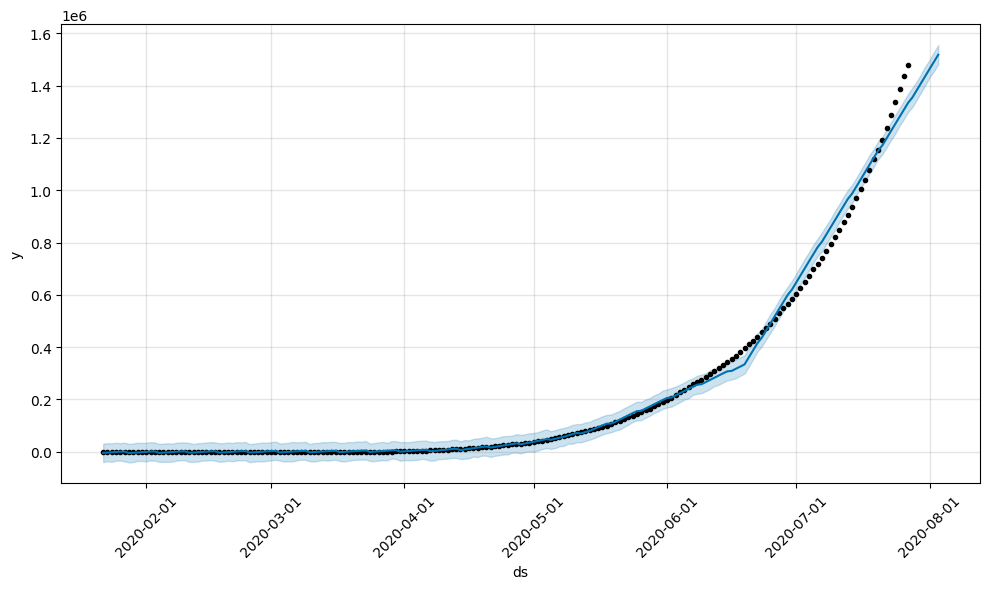

In [39]:
# Make prediction
forecast = model.predict(future)

# Plot forecast(formatted year and month into year, month and date)
fig = model.plot(forecast)
ax = fig.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
Output = '''
Dots = actual past data

Solid blue line = Prophet's prediction (including both past and future)

You'll see the line continue beyond the actual data, which is the forecast for the next 7 months
'''
print(Output)


Dots = actual past data

Solid blue line = Prophet's prediction (including both past and future)

You'll see the line continue beyond the actual data, which is the forecast for the next 7 months



In [38]:
Project_report = '''
Project Workflow Summary

1. Data Inspection & Cleaning

Loaded the CSV data

Converted date formats and handled missing values

Checked and removed any duplicate entries

2. Global Trends Visualization

Aggregated confirmed, recovered, and death cases by date

Visualized the trends using Plotly line charts

3. India-Specific Analysis

Filtered data specific to India

Aggregated case counts across dates

Created separate visualizations for India to analyze its individual trend

4. Forecasting with Facebook Prophet

Reformatted data to Prophet's expected structure (ds and y columns)

Trained a model on the historical confirmed cases for India

Forecasted cases for the upcoming 7 days

Visualized forecast along with uncertainty intervals

 Key Insights

Consistent upward trend observed globally and in India, especially in early waves

Forecast indicated potential future growth based on current patterns

Interactive charts enabled easy interpretation of historical trends

 Conclusion

This project effectively demonstrates how to clean, visualize, and forecast real-world COVID-19 data using Python.
The combined use of Pandas, Plotly, and Prophet delivers a powerful toolkit for data analysis and prediction.
The approach can be extended to other countries or metrics (e.g., deaths, recoveries) for more comprehensive analysis.

Submitted By: [Bharath G]

'''
print(Project_report)


Project Workflow Summary

1. Data Inspection & Cleaning

Loaded the CSV data

Converted date formats and handled missing values

Checked and removed any duplicate entries

2. Global Trends Visualization

Aggregated confirmed, recovered, and death cases by date

Visualized the trends using Plotly line charts

3. India-Specific Analysis

Filtered data specific to India

Aggregated case counts across dates

Created separate visualizations for India to analyze its individual trend

4. Forecasting with Facebook Prophet

Reformatted data to Prophet's expected structure (ds and y columns)

Trained a model on the historical confirmed cases for India

Forecasted cases for the upcoming 7 days

Visualized forecast along with uncertainty intervals

 Key Insights

Consistent upward trend observed globally and in India, especially in early waves

Forecast indicated potential future growth based on current patterns

Interactive charts enabled easy interpretation of historical trends

 Conclusion

Th